In [20]:
# URL сторінки з таблицею
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Зчитування таблиці зі сторінки
tables = pd.read_html(url)

In [23]:
# Вибір потрібної таблиці
table = tables[12]

In [24]:
# Вивести список назв стовпців
print("Назви стовпців:")
print(table.columns)

Назви стовпців:
Index(['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014',
       '2019'],
      dtype='object')


In [25]:
# Перші рядки таблиці
print(f"Перші рядки таблиці:\n {table.head()}\n")

Перші рядки таблиці:
              Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [26]:
# Розмір таблиці (кількість рядків та стовпців)
num_rows, num_columns = table.shape
print("\nРозмір таблиці:")
print(f"Рядків: {num_rows},\nСтовпців: {num_columns}\n")


Розмір таблиці:
Рядків: 28,
Стовпців: 9


In [27]:
# Заміна "—" на NaN
replase_table = table.replace(to_replace='—', value=np.NaN)
print(f'Заміна "—" на NaN\n {replase_table}\n')

Заміна "—" на NaN
                Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   1

In [28]:
# Визначте типи всіх стовпців
print(f"Типи стовпців:\n {table.dtypes}\n")

Типи стовпців:
 Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [29]:
# Заміна типів нечислових колонок на числові
replase_table = replase_table.apply(pd.to_numeric, errors='ignore')
print(f'Заміна типів нечислових колонок на числові\n {replase_table}\n')

Заміна типів нечислових колонок на числові
                Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62  

In [30]:
# Частка пропусків в кожній колонці
missing_data_percentage = table.isnull().sum() / num_rows * 100
print(f"Частка пропусків в кожній колонці:\n {missing_data_percentage}\n")

Частка пропусків в кожній колонці:
 Регіон    0.000000
1950      7.142857
1960      3.571429
1970      3.571429
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.000000
2019      0.000000
dtype: float64


In [31]:
# Видалення рядкa з даними по всій країні
replase_table = replase_table.drop([num_rows - 1])
print(f'Таблиця без останнього рядка\n {replase_table}\n')

Таблиця без останнього рядка
                Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0   

In [32]:
# Заміна відсутніх значень середніми значеннями стовпців
regions = replase_table["Регіон"].copy()
replase_table_numeric = replase_table.drop(columns=["Регіон"]).applymap(pd.to_numeric, errors='coerce')
replase_table_filled = replase_table_numeric.fillna(replase_table_numeric.mean())
replase_table_filled.insert(0, "Регіон", regions)
print(replase_table_filled)

               Регіон    1950        1960   1970  1990  2000  2012    2014  \
0                Крим  230.00  206.000000  160.0   130    73   126  111.44   
1           Вінницька  224.00  192.000000  142.0   124    84   112  109.00   
2           Волинська  247.00  250.000000  179.0   153   112   148  141.00   
3    Дніпропетровська  204.00  204.000000  151.0   123    71   112  111.00   
4            Донецька  271.00  214.000000  140.0   109    61    98   82.00   
5         Житомирська  261.00  223.000000  159.0   129    89   122  120.00   
6        Закарпатська  314.00  273.000000  207.0   168   115   151  146.00   
7          Запорізька  219.00  197.000000  150.0   124    71   106  106.00   
8   Івано-Франківська  243.00  248.000000  182.0   155   103   124  122.00   
9            Київська  204.00  189.000000  156.0   123    73   122  121.00   
10     Кіровоградська  216.00  171.000000  145.0   126    79   110  108.00   
11          Луганська  262.00  235.000000  144.0   116    62    

In [33]:
# Список регіонів з вищим рівнем народжуваності у 2019 році за середнім по Україні
table_filled = replase_table_filled.fillna(replase_table_filled.iloc[-1])
average_birth_rate_2019 = table_filled.iloc[-1]["2019"]
higher_than_average = table_filled[table_filled["2019"] > average_birth_rate_2019]
print("Список регіонів з вищим рівнем народжуваності:")
for index, row in higher_than_average.iterrows():
    print(f"Регіон: {row['Регіон']}, Народжуваність 2019: {row['2019']}")

Список регіонів з вищим рівнем народжуваності:
Регіон: Волинська, Народжуваність 2019: 101.0
Регіон: Закарпатська, Народжуваність 2019: 104.0
Регіон: Івано-Франківська, Народжуваність 2019: 88.0
Регіон: Львівська, Народжуваність 2019: 87.0
Регіон: Одеська, Народжуваність 2019: 88.0
Регіон: Рівненська, Народжуваність 2019: 107.0
Регіон: Херсонська, Народжуваність 2019: 81.0
Регіон: Чернівецька, Народжуваність 2019: 92.0
Регіон: Київ, Народжуваність 2019: 110.0


In [34]:
# Регіон з найвищою народжуваністю у 2014 році
replase_table.set_index("Регіон", inplace=True)
table_with_means = replase_table.apply(pd.to_numeric, errors='coerce')
table_with_means = table_with_means.fillna(table_with_means.mean())
region_highest_birth_rate_2014 = table_with_means["2014"].idxmax()
print("\nРегіон з найвищою народжуваністю у 2014 році:", region_highest_birth_rate_2014)


Регіон з найвищою народжуваністю у 2014 році: Рівненська


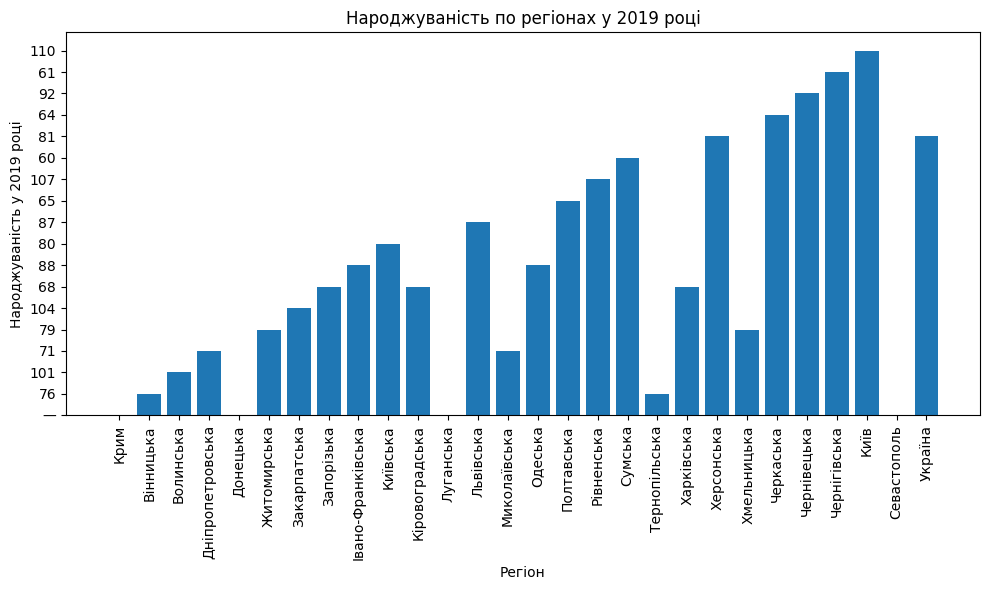

In [35]:
# Побудова стовпчикової діаграми народжуваності по регіонах у 2019 році
plt.figure(figsize=(10, 6))
plt.bar(table["Регіон"], table["2019"])
plt.xticks(rotation=90)
plt.xlabel("Регіон")
plt.ylabel("Народжуваність у 2019 році")
plt.title("Народжуваність по регіонах у 2019 році")
plt.tight_layout()
plt.show()

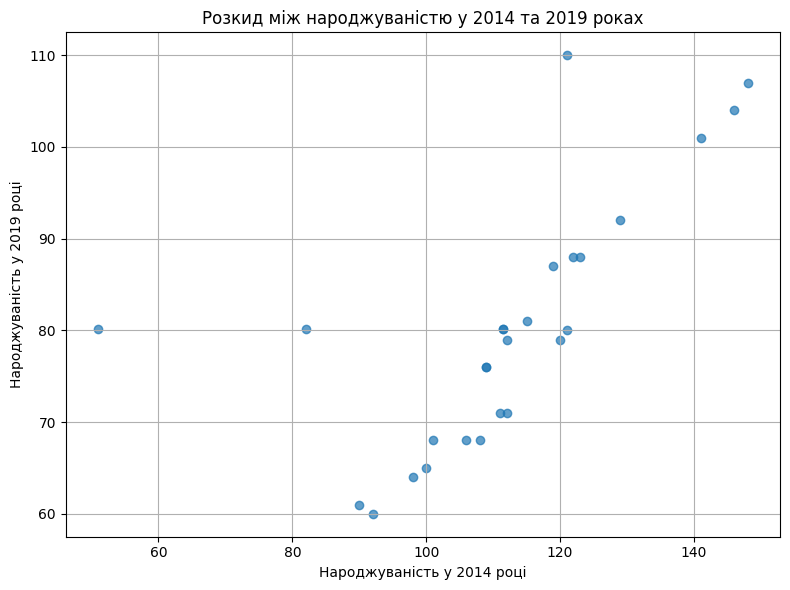

In [36]:
# Графік розкиду між народжуваністю у 2019 році та народжуваністю у 2014 році
plt.figure(figsize=(8, 6))
plt.scatter(table_filled["2014"], table_filled["2019"], alpha=0.7)
plt.xlabel("Народжуваність у 2014 році")
plt.ylabel("Народжуваність у 2019 році")
plt.title("Розкид між народжуваністю у 2014 та 2019 роках")
plt.grid(True)
plt.tight_layout()
plt.show()

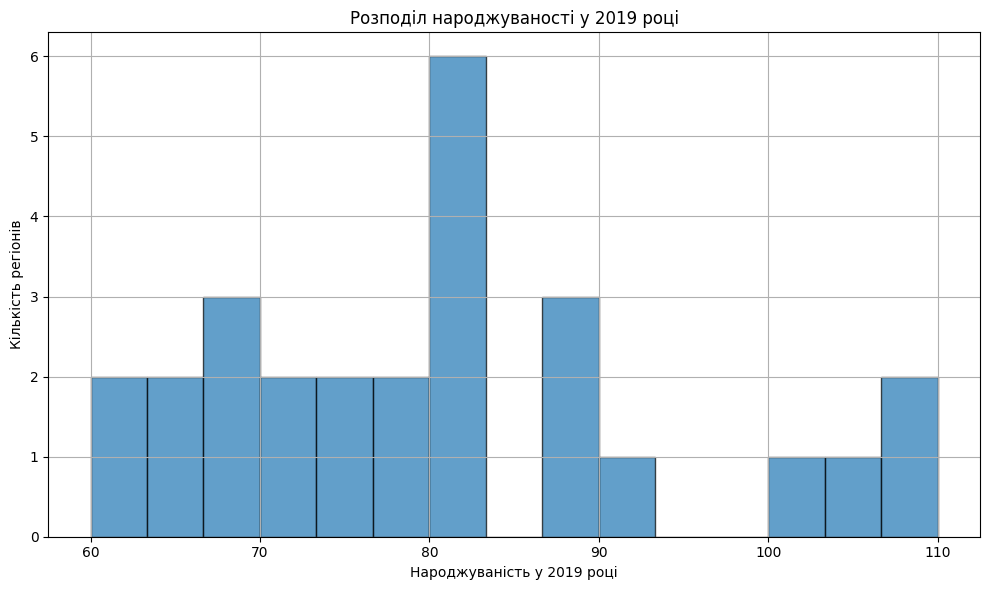

In [37]:
# Гістограма народжуваності у 2019 році
plt.figure(figsize=(10, 6))
plt.hist(table_filled["2019"], bins=15, edgecolor='black', alpha=0.7)
plt.xlabel("Народжуваність у 2019 році")
plt.ylabel("Кількість регіонів")
plt.title("Розподіл народжуваності у 2019 році")
plt.grid(True)
plt.tight_layout()
plt.show()

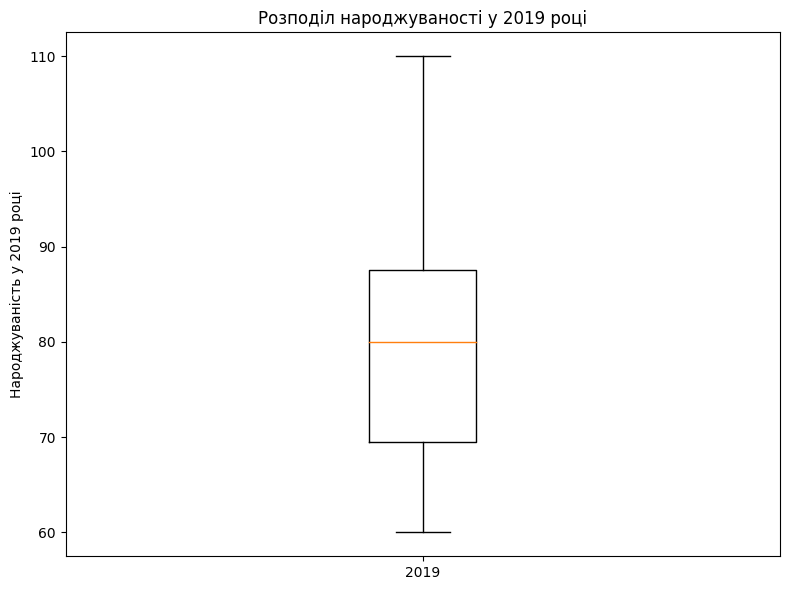

In [38]:
# Графік "ящик з вусами" для народжуваності у 2019 році
plt.figure(figsize=(8, 6))
plt.boxplot(table_filled["2019"])
plt.ylabel("Народжуваність у 2019 році")
plt.title("Розподіл народжуваності у 2019 році")
plt.xticks([1], ['2019'])
plt.tight_layout()
plt.show()